# **Extra Trees (ET)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving TOC_Prediction_DataSet.xlsx to TOC_Prediction_DataSet.xlsx


In [3]:
df=pd.read_excel('TOC_Prediction_DataSet.xlsx')

In [4]:
df.head()

,Thickness_ft,Bulk Density_gg per cc,Resistivity_ohmsm,Effective Porosity_Fraction,Clay Volume_ Fraction,Water Saturation_Fraction,TOC_Fraction
0,219.713745,2.415151,3.151841,0.066973,0.228949,0.466486,0.057828
1,160.308606,2.430899,3.160330,0.034790,0.297078,0.544329,0.051316
2,149.944934,2.424665,4.087933,0.062167,0.311720,0.426713,0.055788
3,209.811890,2.394232,2.889251,0.087480,0.227958,0.479112,0.057745
4,167.492163,2.420244,2.881886,0.057664,0.302924,0.523564,0.052154


In [5]:
df.describe()

,Thickness_ft,Bulk Density_gg per cc,Resistivity_ohmsm,Effective Porosity_Fraction,Clay Volume_ Fraction,Water Saturation_Fraction,TOC_Fraction
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,150.448933,2.423001,3.892432,0.061492,0.271257,0.435876,0.052630
std,52.452284,0.019059,1.342193,0.014805,0.045289,0.080023,0.005062
min,50.218753,2.386117,1.680451,0.017432,0.153118,0.230041,0.030830
25%,123.462354,2.409469,3.120852,0.051250,0.238607,0.372234,0.051026
50%,141.662622,2.422639,3.650354,0.061158,0.264785,0.442414,0.053662
75%,166.707110,2.433418,4.319585,0.072289,0.303776,0.490972,0.056100
max,475.992627,2.540608,15.970625,0.096054,0.413083,0.683304,0.060907


In [6]:
df.columns

Index(['Thickness_ft', 'Bulk Density_gg per cc', 'Resistivity_ohmsm',
       'Effective Porosity_Fraction', 'Clay Volume_ Fraction',
       'Water Saturation_Fraction', 'TOC_Fraction'],
      dtype='object')

In [7]:
y=df['TOC_Fraction']
x=df.drop(['TOC_Fraction'], axis=1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
seed= 1000
np.random.seed(seed)
X_train,X_test,y_train, y_test= train_test_split(x, y, test_size=0.30)

In [10]:
from sklearn.ensemble import ExtraTreesRegressor

In [11]:
np.random.seed(seed)
et = ExtraTreesRegressor(n_estimators=5000, criterion='mse',max_depth=None, min_samples_split=4, min_samples_leaf=2,
    max_features='auto', bootstrap=False, n_jobs=-1)

In [12]:
et.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


ExtraTreesRegressor(criterion='mse', min_samples_leaf=2, min_samples_split=4,
                    n_estimators=5000, n_jobs=-1)

In [13]:
y_pred_train=et.predict(X_train)
y_pred_test=et.predict(X_test)

In [14]:
corr_train=np.corrcoef(y_train, y_pred_train) [0,1]

print('Training Data R^2=',round(corr_train**2,4),'R=', round(corr_train,4))

Training Data R^2= 0.9833 R= 0.9916


In [15]:
corr_test=np.corrcoef(y_test, y_pred_test) [0,1]

print('Testing Data R^2=',round(corr_test**2,4),'R=', round(corr_test,4))

Testing Data R^2= 0.867 R= 0.9312


Text(0.5, 1.0, 'TOC Training Actual Vs. Prediction')

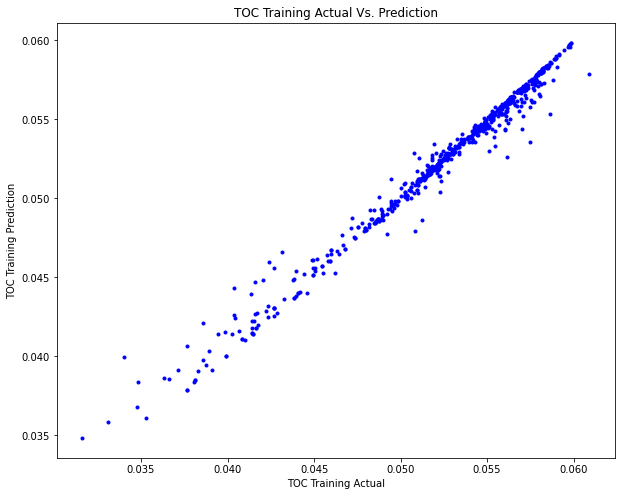

In [16]:
plt.figure(figsize=(10,8))
plt.plot(y_train, y_pred_train, 'b.')
plt.xlabel('TOC Training Actual')
plt.ylabel('TOC Training Prediction')
plt.title('TOC Training Actual Vs. Prediction')

Text(0.5, 1.0, 'TOC Testing Actual Vs. Prediction')

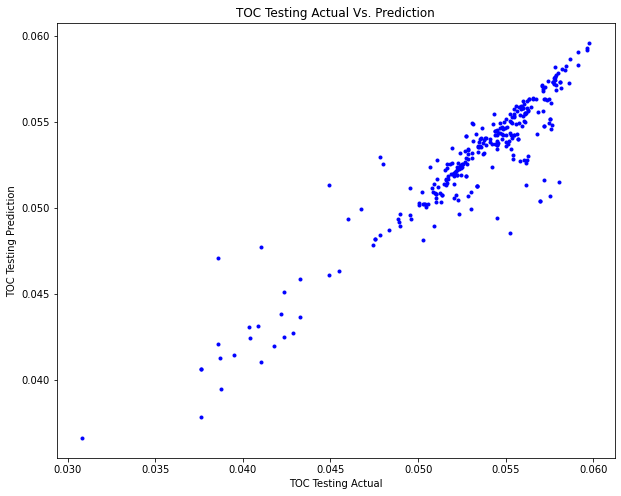

In [17]:
plt.figure(figsize=(10,8))
plt.plot(y_test, y_pred_test, 'b.')
plt.xlabel('TOC Testing Actual')
plt.ylabel('TOC Testing Prediction')
plt.title('TOC Testing Actual Vs. Prediction')

In [18]:
TOC_Actual_Prediction=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_test})
TOC_Actual_Prediction

,Actual,Predicted
834,0.051979,0.051965
604,0.053110,0.053907
747,0.057625,0.054818
908,0.057235,0.056331
545,0.054575,0.053796
...,...,...
809,0.056807,0.054314
166,0.054815,0.054254
172,0.058651,0.058628
263,0.058120,0.057293


In [19]:
from sklearn import metrics
print('MAE:', round(metrics.mean_absolute_error(y_test, y_pred_test),5))
print('MSE:', round(metrics.mean_squared_error(y_test, y_pred_test),5))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)),5))

MAE: 0.00103
MSE: 0.0
RMSE: 0.00176


Text(0.5, 1.0, 'Feature Importance Ranking')

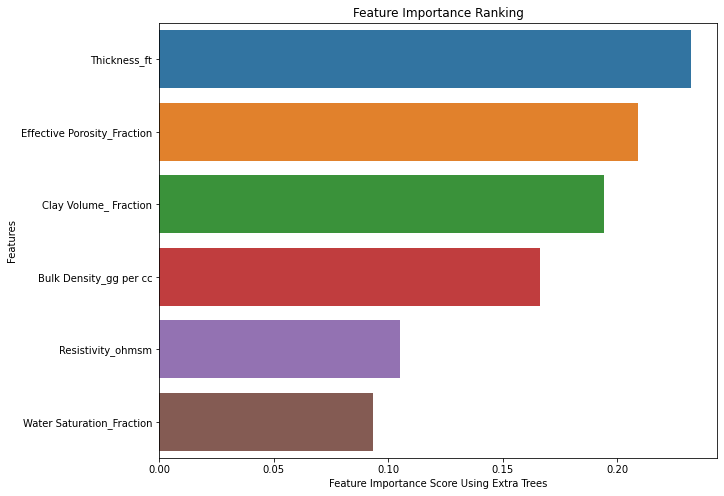

In [20]:
feature_names = df.columns[:-1]
plt.figure(figsize=(10,8))
feature_imp = pd.Series(et.feature_importances_,index=feature_names).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score Using Extra Trees')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
np.random.seed(seed)
scores_R2 = cross_val_score(et, x, y,cv=5,scoring='r2')

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:392: 

In [23]:
print(" R2_Cross-validation scores: {}". format( scores_R2))

 R2_Cross-validation scores: [0.79058329 0.82688943 0.78343302 0.84755269 0.80625756]


In [24]:
print(" Average R2_Cross-validation scores: {}". format( scores_R2.mean()))

 Average R2_Cross-validation scores: 0.8109431964054314
